# Plotting with MatplotLib

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

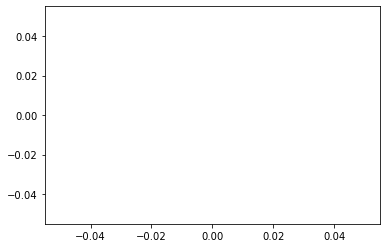

In [5]:
plt.plot();

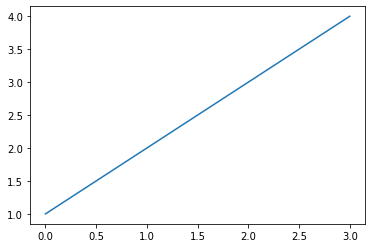

In [6]:
plt.plot([1, 2, 3, 4])
plt.show()

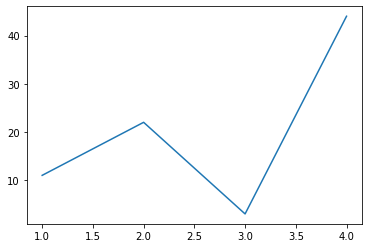

In [10]:
x = [1, 2, 3, 4]
y = [11, 22, 3, 44]
plt.plot(x, y)
plt.show()

### Method 1

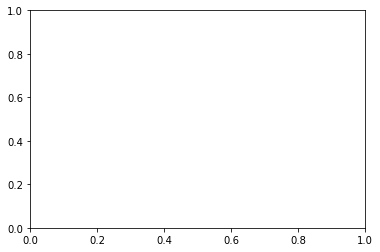

In [15]:
fig = plt.figure()
ax = fig.add_subplot()
plt.show()

### Method 2

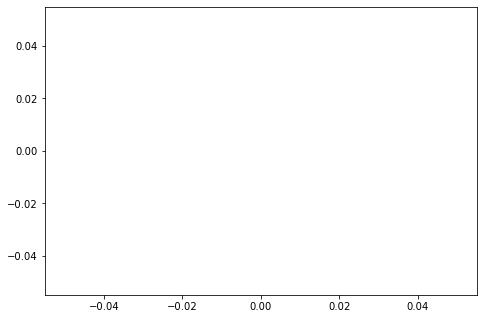

In [21]:
fig = plt.figure()
ax = fig.add_axes([1, 1, 1, 1])
ax.plot()
plt.show()

### Method 3

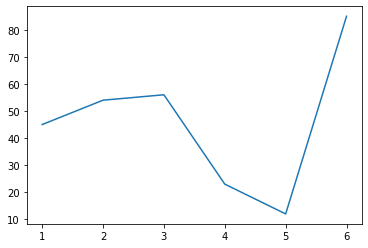

In [25]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4, 5, 6], [45, 54, 56, 23, 12, 85])
plt.show()

### MatplotLib example workflow

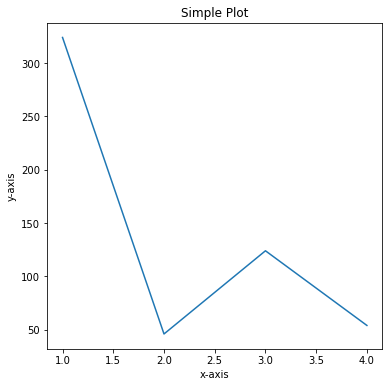

In [33]:
# prep data
x = [1, 2 ,3 ,4]
y = [324, 46, 124, 54]

# setup plot

fig, ax = plt.subplots(figsize=(6, 6))

# add data to axes 

ax.plot(x ,y)

# customize plot

ax.set(title="Simple Plot",
      xlabel="x-axis",
      ylabel="y-axis")

# Save & show the plot (or figure)

fig.savefig("sample-plot.png")

### Making figures with NumPy arrays

In [52]:
# creating data

x = np.linspace(1, 100, 100)
x[:10]

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

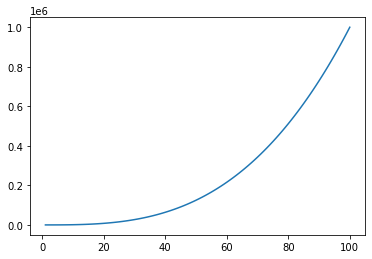

In [53]:
fig ,ax = plt.subplots()
ax.plot(x, x**3)
plt.show()

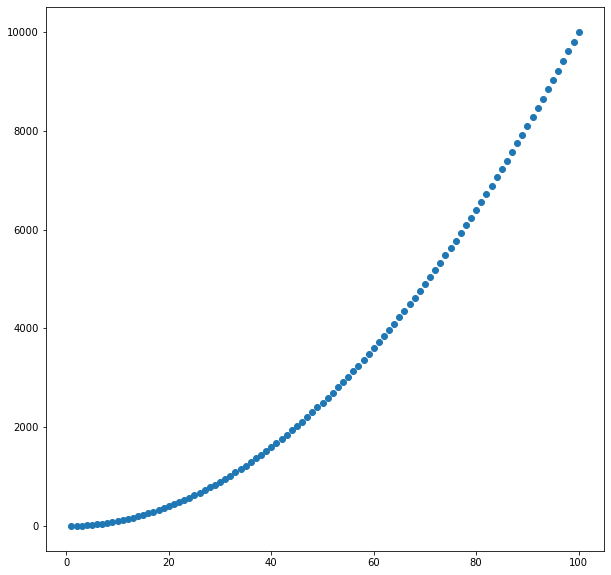

In [54]:
# scatter plot
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x, x**2)
plt.show()

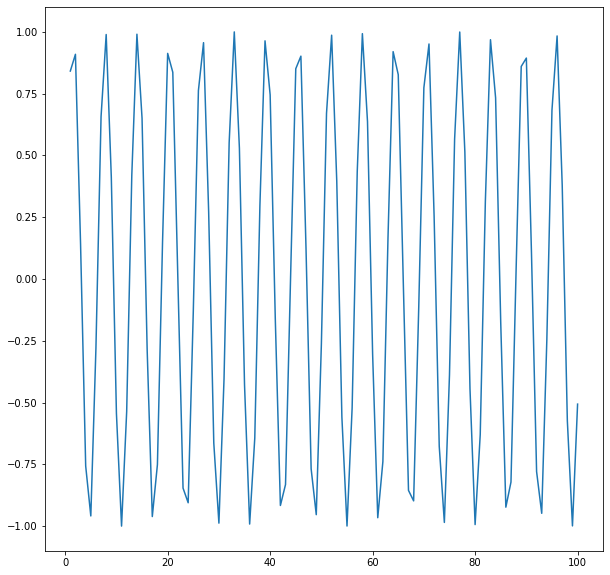

In [72]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x, np.sin(x))
plt.show()

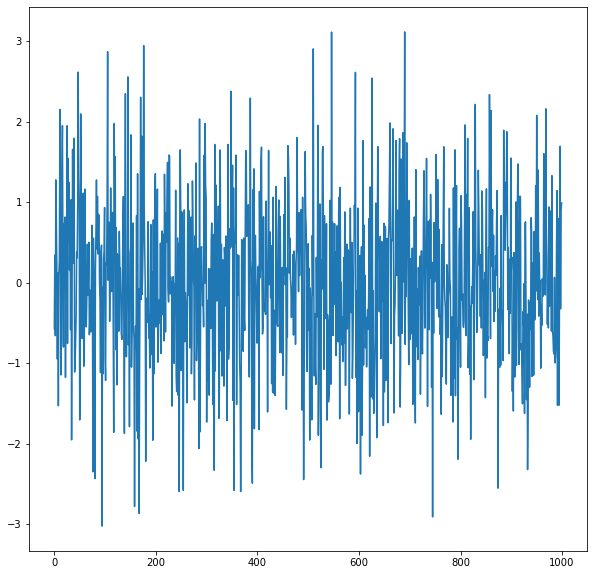

In [78]:
x = np.random.randn(1000)
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x)
plt.show()

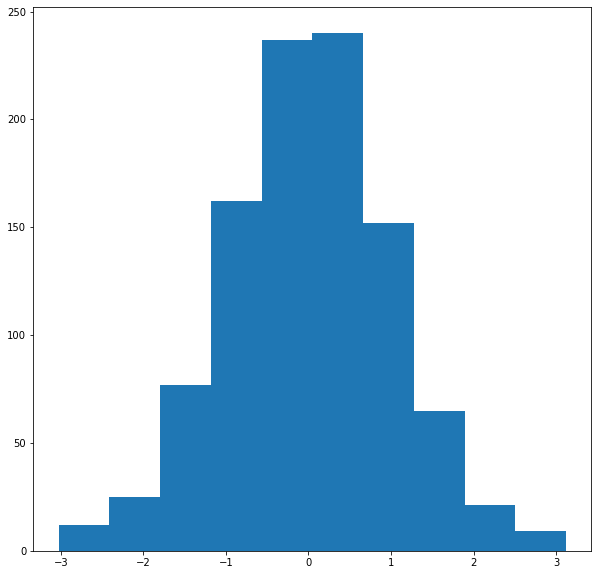

In [79]:
fig, ax = plt.subplots(figsize=(10,10))
ax.hist(x)
plt.show()

## Two methods for subplot 

### Method 1

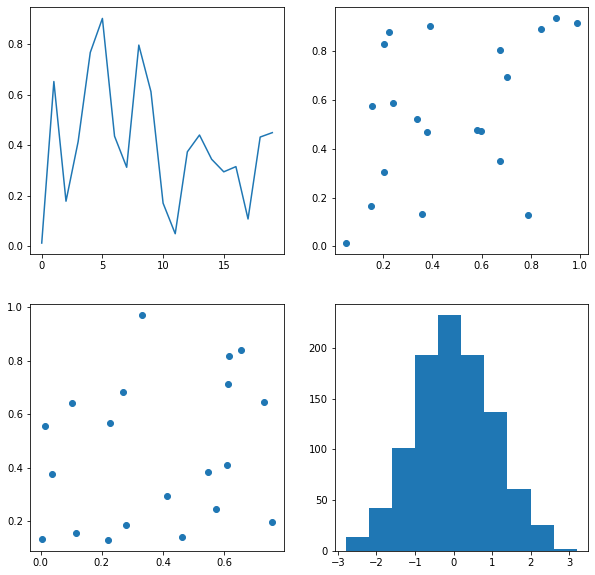

In [96]:
fig ,  ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                              ncols=2,
                                              figsize=(10,10))

# x = np.random.random(20)

ax1.plot(np.random.random(20))

ax2.scatter(np.random.random(20), np.random.random(20))

ax3.scatter(np.random.random(20), np.random.random(20))

ax4.hist(np.random.randn(1000))

plt.show()

### Method 2

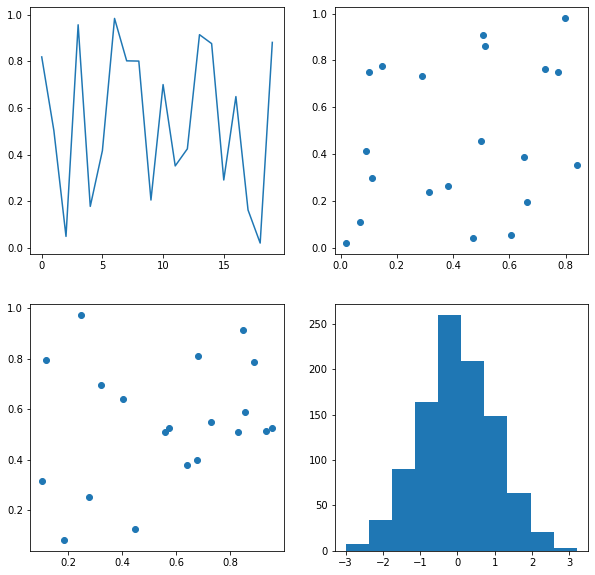

In [100]:
fig, ax = plt.subplots(nrows=2,
                      ncols=2,
                      figsize=(10,10))
ax[0, 0].plot(np.random.random(20))

ax[0, 1].scatter(np.random.random(20), np.random.random(20))

ax[1, 0].scatter(np.random.random(20), np.random.random(20))

ax[1, 1].hist(np.random.randn(1000))

plt.show()

# Plotting from Pandas DataFrames

In [129]:
car_sales = pd.read_csv("car-sales.csv")
car_sales

,Make,Color,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [130]:
car_sales.dtypes

Make             object
Color            object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

In [148]:
# %timeit x = car_sales["Price"].str[:-3].str.replace('$', '').str.replace(',', '')
# %timeit x = car_sales["Price"].str[:-3].replace('[\$\,]', '', regex=True)
# 679 µs ± 8.29 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
# 452 µs ± 12.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

In [149]:
car_sales["Price"] = car_sales["Price"].str[:-3].replace('[\$\,]', '', regex=True).astype(int)

In [150]:
car_sales

,Make,Color,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [171]:
car_sales["Sale Date"] = pd.date_range("1/1/2020", periods=len(car_sales.index), freq="B")
car_sales

,Make,Color,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-06,38000
4,Nissan,White,213095,4,3500,2020-01-07,41500
5,Toyota,Green,99213,4,4500,2020-01-08,46000
6,Honda,Blue,45698,4,7500,2020-01-09,53500
7,Honda,Blue,54738,4,7000,2020-01-10,60500
8,Toyota,White,60000,4,6250,2020-01-13,66750
9,Nissan,White,31600,4,9700,2020-01-14,76450


In [157]:
car_sales["Total Sales"] = car_sales["Price"].cumsum()
car_sales

,Make,Color,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-06,38000
4,Nissan,White,213095,4,3500,2020-01-07,41500
5,Toyota,Green,99213,4,4500,2020-01-08,46000
6,Honda,Blue,45698,4,7500,2020-01-09,53500
7,Honda,Blue,54738,4,7000,2020-01-10,60500
8,Toyota,White,60000,4,6250,2020-01-13,66750
9,Nissan,White,31600,4,9700,2020-01-14,76450


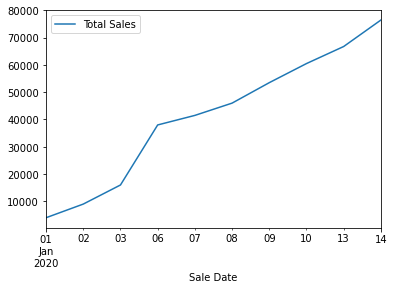

In [159]:
car_sales.plot(x="Sale Date", y="Total Sales")
plt.show()

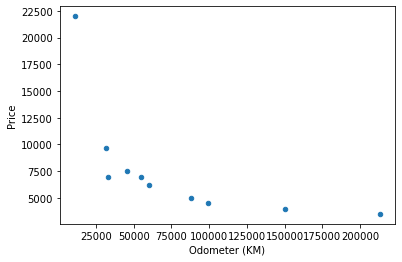

In [169]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter")
plt.show()

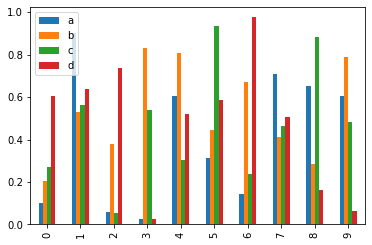

In [179]:
x = np.random.rand(10, 4)
df = pd.DataFrame(x, columns=["a", "b", "c", "d"])
df.plot.bar()
plt.show()

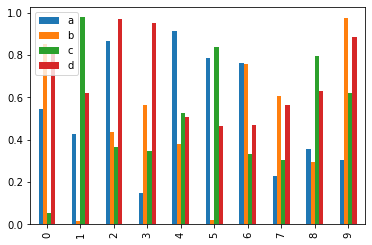

In [180]:
x = np.random.rand(10, 4)
df = pd.DataFrame(x, columns=["a", "b", "c", "d"])
df.plot(kind='bar')
plt.show()

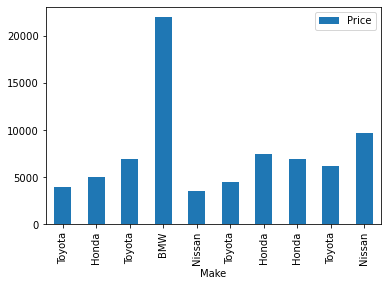

In [184]:
car_sales.plot(x="Make", y="Price", kind="bar")
plt.show()

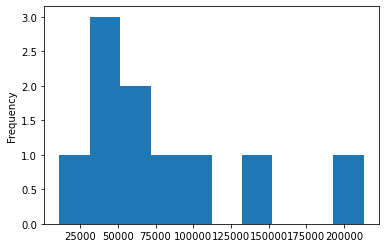

In [187]:
car_sales["Odometer (KM)"].plot.hist();

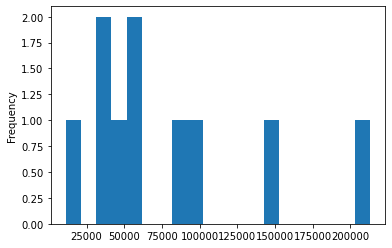

In [189]:
car_sales["Odometer (KM)"].plot.hist(bins=20);

In [191]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


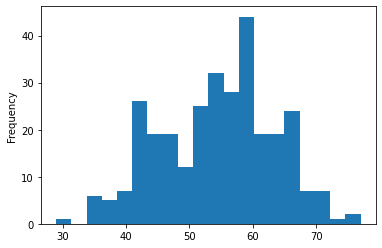

In [194]:
heart_disease["age"].plot.hist(bins=20);


In [237]:
over_50 = heart_disease[heart_disease["age"] > 50]
over_50

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


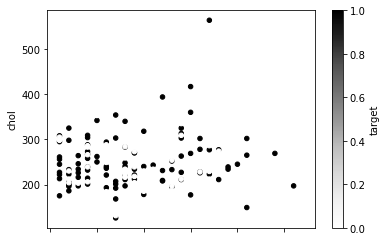

In [238]:
#pyplot method
over_50.plot.scatter(x="age", y="chol", c="target");

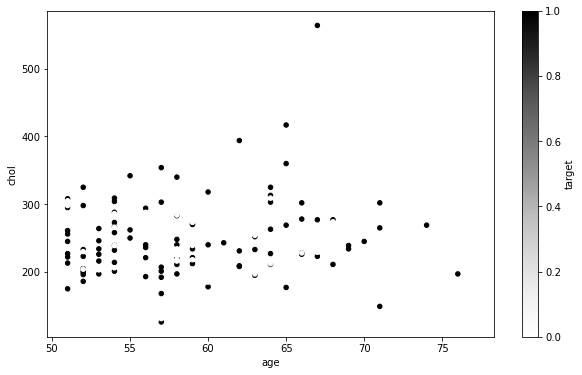

In [239]:
fig, ax= plt.subplots(figsize=(10,6))
over_50.plot.scatter(x="age", y="chol", c="target", ax=ax)
# ax.set_xlim([45, 80]);
plt.show()

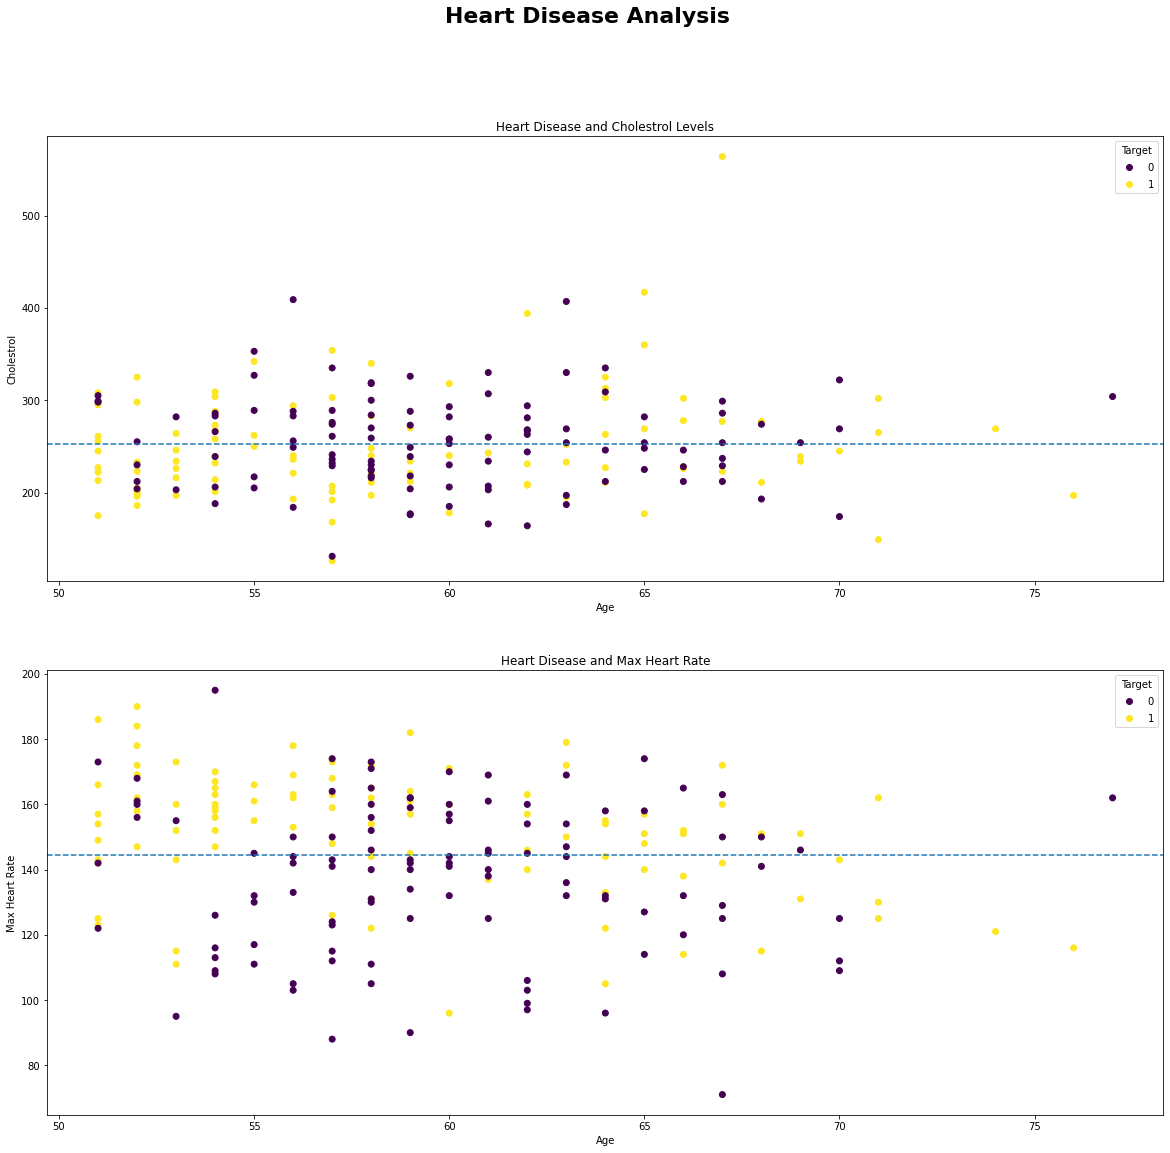

In [247]:
fig, (ax0 ,ax1) = plt.subplots(figsize=(20, 18), nrows=2)

scatter0 = ax0.scatter(x=over_50["age"], y=over_50["chol"], c=over_50["target"])

ax0.set(title="Heart Disease and Cholestrol Levels", 
      xlabel="Age",
      ylabel="Cholestrol")

ax0.legend(*scatter0.legend_elements(), title="Target")

ax0.axhline(y=over_50["chol"].mean(), linestyle="--")

####

scatter1 = ax1.scatter(x=over_50["age"], y=over_50["thalach"], c=over_50["target"])

ax1.set(title="Heart Disease and Max Heart Rate", 
      xlabel="Age",
      ylabel="Max Heart Rate")

ax1.legend(*scatter1.legend_elements(), title="Target")

ax1.axhline(y=over_50["thalach"].mean(), linestyle="--")

fig.suptitle("Heart Disease Analysis", fontsize=22, fontweight="bold")

plt.show()

### Customizing MatplotLib

In [258]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

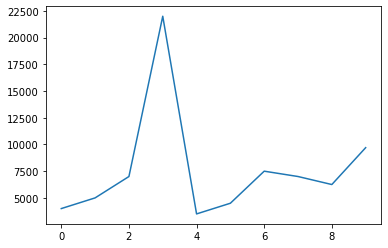

In [261]:
car_sales["Price"].plot();

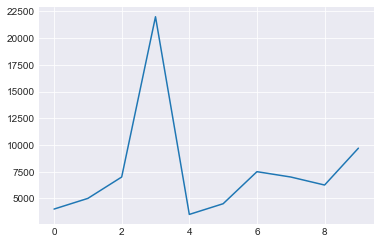

In [264]:
plt.style.use("seaborn-darkgrid")
car_sales["Price"].plot();

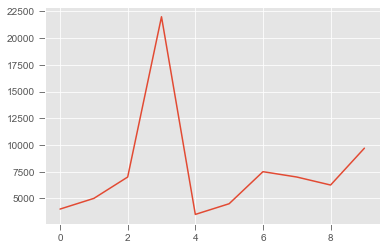

In [268]:
plt.style.use("ggplot")
car_sales["Price"].plot();

In [277]:
x = pd.DataFrame(np.random.randn(10, 4), columns=["a", "b", "c", "d"])
x[:5]

,a,b,c,d
0,-0.899916,1.057557,-0.017066,-0.088085
1,1.423317,-1.021436,-1.984175,-0.038894
2,-1.341573,1.715325,1.345147,0.146688
3,-0.893315,1.952402,-1.452043,0.687940
4,1.062062,0.000795,-0.596256,2.156074


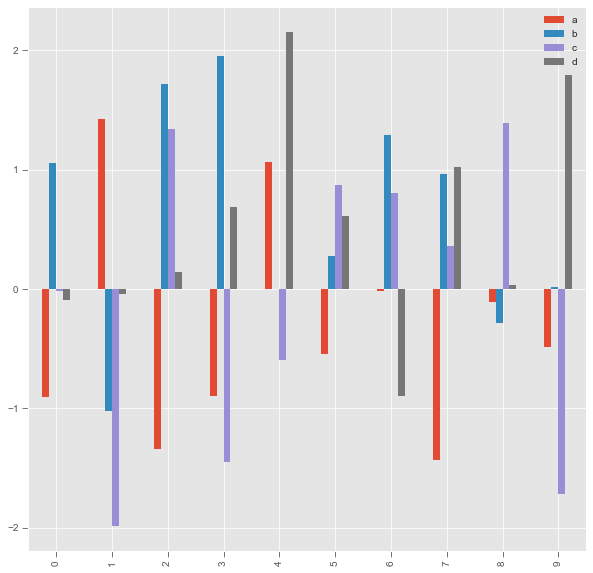

In [278]:
x.plot.bar(figsize=(10,10));

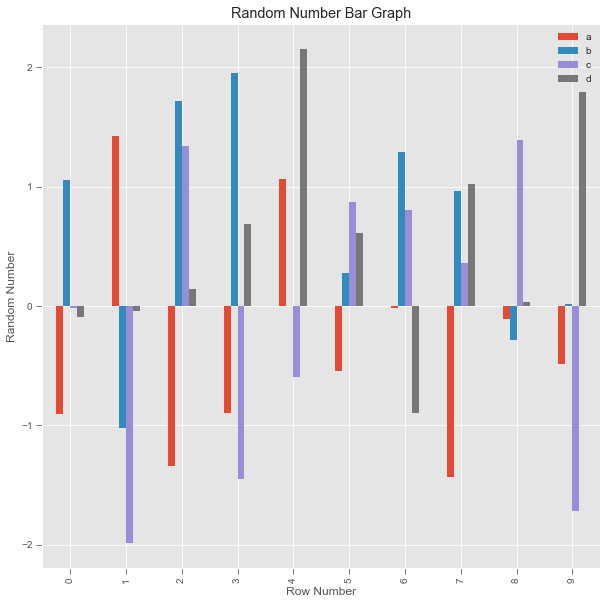

In [281]:
ax = x.plot.bar(figsize=(10,10))

ax.set(title="Random Number Bar Graph",
      xlabel="Row Number",
      ylabel="Random Number")

plt.show()

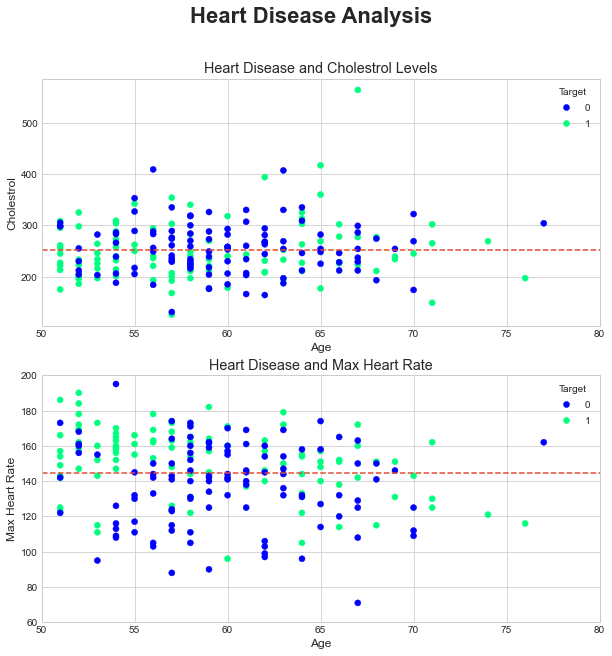

In [291]:
plt.style.use('seaborn-whitegrid')

fig, (ax0 ,ax1) = plt.subplots(figsize=(10, 10), nrows=2)

scatter0 = ax0.scatter(x=over_50["age"], y=over_50["chol"], c=over_50["target"], cmap="winter")

ax0.set(title="Heart Disease and Cholestrol Levels", 
      xlabel="Age",
      ylabel="Cholestrol")
ax0.set_xlim(50, 80)

ax0.legend(*scatter0.legend_elements(), title="Target")

ax0.axhline(y=over_50["chol"].mean(), linestyle="--")

####

scatter1 = ax1.scatter(x=over_50["age"], y=over_50["thalach"], c=over_50["target"], cmap="winter")

ax1.set(title="Heart Disease and Max Heart Rate", 
      xlabel="Age",
      ylabel="Max Heart Rate")
ax1.set_xlim(50, 80)
ax1.set_ylim(60, 200)

ax1.legend(*scatter1.legend_elements(), title="Target")

ax1.axhline(y=over_50["thalach"].mean(), linestyle="--")

fig.suptitle("Heart Disease Analysis", fontsize=22, fontweight="bold")

plt.show()

In [292]:
fig.savefig("heart-disease-analysis.png")